In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load the dataset

df = pd.read_csv('California_Houses.csv')

In [ ]:
# Columns in the dataset - 14 columns

df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [ ]:
# First 5 rows of the dataset

df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
# Correlation between different variables

df.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248


In [ ]:
# Data normalization - Using The min-max feature scaling

for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [ ]:
# First 5 rows after normalization(range of values = [0,1])

df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,0.902266,0.539668,0.784314,0.022331,0.019863,0.008941,0.020556,0.567481,0.211155,0.027398,0.546362,0.614340,0.079961,0.023023
1,0.708247,0.538027,0.392157,0.180503,0.171477,0.067210,0.186976,0.565356,0.212151,0.030283,0.544152,0.612446,0.077112,0.022614
2,0.695051,0.466028,1.000000,0.037260,0.029330,0.013818,0.028943,0.564293,0.210159,0.024390,0.544477,0.612688,0.076894,0.020323
3,0.672783,0.354699,1.000000,0.032352,0.036313,0.015555,0.035849,0.564293,0.209163,0.022918,0.545050,0.613164,0.077396,0.019459
4,0.674638,0.230776,1.000000,0.041330,0.043296,0.015752,0.042427,0.564293,0.209163,0.022918,0.545050,0.613164,0.077396,0.019459


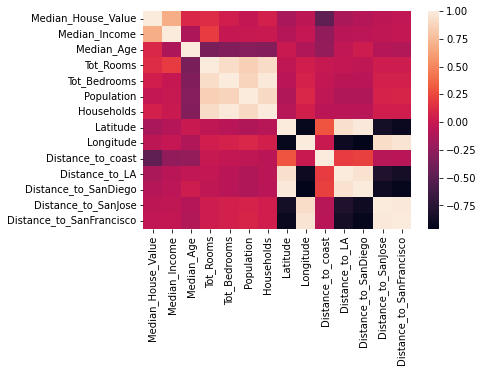

In [ ]:
# Visualizing correlation between different variables using 'heatmap'

dataplot = seaborn.heatmap(df.corr())
plt.show()

In [ ]:
# Defining predictors(x)

x = df.drop(['Median_House_Value'], axis=1)
x.columns

Index(['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
       'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [ ]:
# Defining target(y)

y = df['Median_House_Value'] 

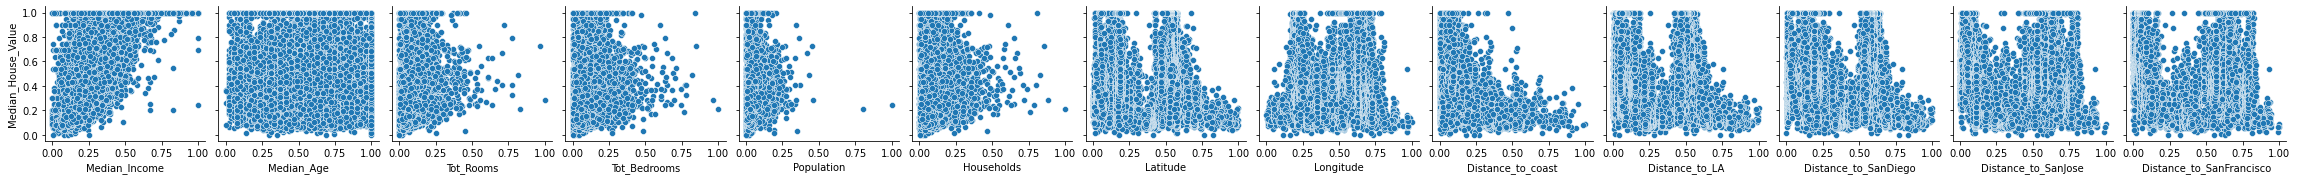

In [ ]:
# Scatter plot between different features and the target

seaborn.pairplot(df,x_vars=[col for col in x.columns],y_vars=['Median_House_Value'])

In [ ]:
# Train and test sets - Using train_test_split()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
# Lists for strong results

r2scores = []
mse = []
modelnames = []

R2 score = 0.6394761802059223
MSE = 0.020434037978569217


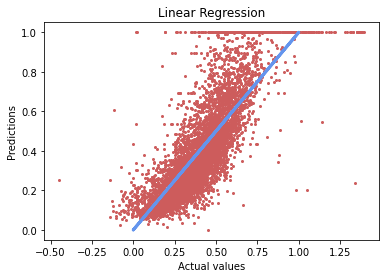

In [ ]:
# Linear Regression

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
modelnames.append(type(model).__name__)
r2scores.append(r2)
mse.append(MSE)
print('R2 score =', r2)
print('MSE =',MSE)
plt.scatter(y_pred,y_test,s=4, color='indianred')
plt.title('Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)

R2 score = 0.740245309353053
MSE = 0.014722570111519728


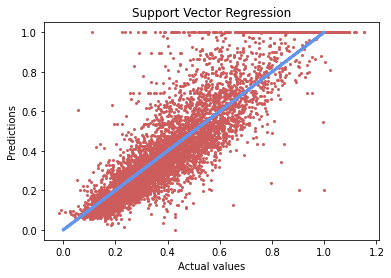

In [ ]:
# SVM for Regression - Support Vector Regression

svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
r2 = r2_score(y_test,y_pred_svr)
MSE = mean_squared_error(y_test,y_pred_svr)
modelnames.append(type(svr).__name__)
r2scores.append(r2)
mse.append(MSE)
print('R2 score =', r2)
print('MSE =',MSE)
plt.scatter(y_pred_svr,y_test,s=4, color='indianred')
plt.title('Support Vector Regression')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)

R2 score = 0.6509800264383458
MSE = 0.019782014400911496


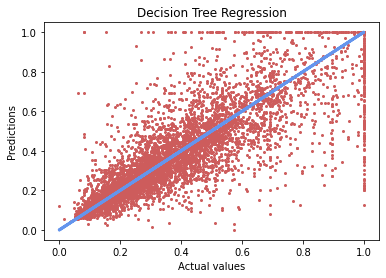

In [ ]:
# Decision Tree Regression

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)
r2 = r2_score(y_test,y_pred_dtr)
MSE = mean_squared_error(y_test,y_pred_dtr)
modelnames.append(type(dtr).__name__)
r2scores.append(r2)
mse.append(MSE)
print('R2 score =', r2)
print('MSE =',MSE)
plt.scatter(y_pred_dtr,y_test,s=4, color='indianred')
plt.title('Decision Tree Regression')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)

R2 score = 0.8251683070556471
MSE = 0.009909241102357653


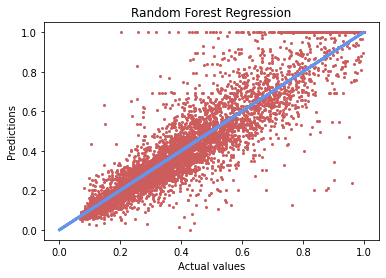

In [ ]:
# Random Forest Regression

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
r2 = r2_score(y_test,y_pred_rfr)
MSE = mean_squared_error(y_test,y_pred_rfr)
modelnames.append(type(rfr).__name__)
r2scores.append(r2)
mse.append(MSE)
print('R2 score =', r2)
print('MSE =',MSE)
plt.scatter(y_pred_rfr,y_test,s=4, color='indianred')
plt.title('Random Forest Regression')
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)

In [ ]:
# ML Model Results

results = pd.DataFrame({'Model':modelnames,'R2 Score':r2scores, 'MSE': mse})
print(results)

                   Model  R2 Score       MSE
0       LinearRegression  0.639476  0.020434
1                    SVR  0.740245  0.014723
2  DecisionTreeRegressor  0.650980  0.019782
3  RandomForestRegressor  0.825168  0.009909


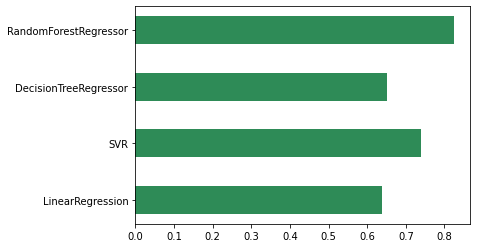

In [ ]:
# Visualizing R2 scores of all ML models

plt.barh(modelnames,r2scores,color='seagreen',height=0.5)
plt.show()

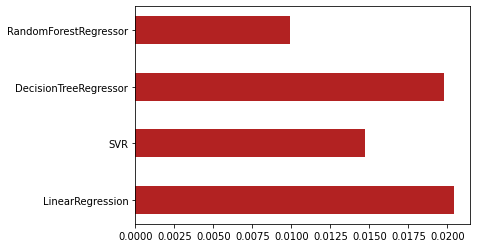

In [ ]:
# Visualizing MSE of all ML models

plt.barh(modelnames,mse,color='firebrick',height=0.5)
plt.show()

In [ ]:
'''Random Forest Regression model has the highest R2 score of 0.826522.
Thus, it is the most suitable Machine Learning model out of all the 
models, for the given dataset'''

'Random Forest Regression model has the highest R2 score of 0.826522.\nThus, it is the most suitable Machine Learning model out of all the \nmodels, for the given dataset'

In [ ]:
# Feature importance in Random Forest Regression Model

rfr.feature_importances_

array([0.48298641, 0.03184677, 0.01783639, 0.01368309, 0.02099053,
       0.01197951, 0.061649  , 0.03607334, 0.20075997, 0.02962514,
       0.02743209, 0.02908924, 0.03604852])

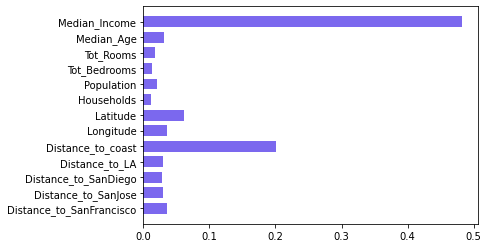

In [ ]:
# Visualizing Feature Importance in Random Forest Regression Model

plt.barh([x.columns[i] for i in range(len(x.columns)-1,-1,-1)],[rfr.feature_importances_[i] for i in range(len(rfr.feature_importances_)-1,-1,-1)],color='mediumslateblue',height=0.7)
plt.show()

In [ ]:
'''The feature Median_Income has the highest importance followed by 
Distance_to_coast and Latitude'''

'The feature Median_Income has the highest importance followed by \nDistance_to_coast and Latitude'